Kaggle Digit Recognizer 
> https://www.kaggle.com/competitions/digit-recognizer/overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots

from  IPython import display
from matplotlib import pyplot as plt

import numpy as np

import pathlib
import shutil
import tempfile
import math

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
logdir = pathlib.Path(tempfile.mkdtemp())/"tensorboard_logs"
shutil.rmtree(logdir, ignore_errors=True)

In [4]:
df = pd.read_csv('./train.csv')
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['label'], axis=1), df['label'], train_size=0.8)
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
8052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30051,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
530,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
8274,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21342,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34105,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30272,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26621,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
i = np.array(df.drop(['label'], axis=1)).reshape(-1, 28, 28)[3]
df.iloc[3, 0]

4

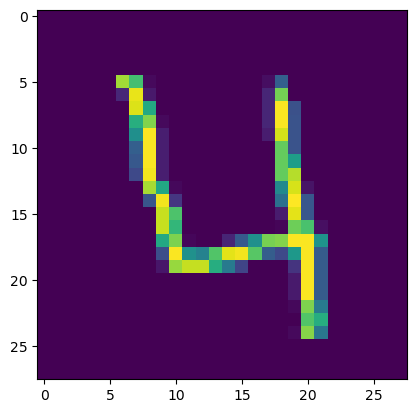

In [9]:
plt.imshow(i)

In [10]:
np.array(df.drop(['label'], axis=1)).reshape(-1, 28, 28)

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
8052,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30051,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26581,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18869,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29890,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
530,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X_train2 = tf.cast((X_train.to_numpy()/255).reshape(-1, 28, 28, 1), tf.float64)
X_test2 = tf.cast((X_test.to_numpy()/255).reshape(-1, 28, 28, 1), tf.float64)
X_train2.shape, X_test2.shape

(TensorShape([33600, 28, 28, 1]), TensorShape([8400, 28, 28, 1]))

In [31]:
train, test = train_test_split(df, train_size=0.7)
test, val = train_test_split(test, train_size=0.5)

def X_y(df):
    X = (df.drop('label', axis=1).to_numpy()/255).reshape(-1, 28, 28, 1)
    y = df['label']
    return X, y

train_X, train_y = X_y(train)
val_X, val_y = X_y(val)
test_X, test_y = X_y(test)
train_X.shape, train_y.shape, val_X.shape, val_y.shape, test_X.shape, test_y.shape

((29399, 28, 28, 1),
 (29399,),
 (6301, 28, 28, 1),
 (6301,),
 (6300, 28, 28, 1),
 (6300,))

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

RSC = RandomForestClassifier()

RSC.fit(X_train, y_train)

RSC.score(X_test, y_test)

#0.9647619047619047

In [49]:
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=1050*1000,
  decay_rate=1,
  staircase=False)

def get_callbacks(name):
  return [
    tfdocs.modeling.EpochDots(),
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20),
    tf.keras.callbacks.TensorBoard(logdir/name),
  ]

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

checkpoint_filepath = './tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

In [50]:
def compile_and_fit(model, name, max_epochs=10000):
    optimizer = get_optimizer()
    model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics = ['accuracy'])
    
    model.summary()

    history = model.fit(
        x = train_X,
        y = train_y,
        epochs=max_epochs,
        validation_data = (val_X, val_y),
        callbacks = [get_callbacks(name), model_checkpoint_callback]
    )
    return history

histories={}
plotter = tfdocs.plots.HistoryPlotter(metric = 'accuracy', smoothing_std=10)

In [23]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(24, kernel_size=5, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

histories['(C-P)x1'] = compile_and_fit(model1, '(C-P)x1')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 24)        624       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 24)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 4704)              0         
                                                                 
 dense_12 (Dense)            (None, 784)               3688720   
                                                                 
 dense_13 (Dense)            (None, 256)               200960    
                                                                 
 dense_14 (Dense)            (None, 10)                2570      
                                                      

c:\Users\rohit\anaconda3\envs\environment\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1046/1050 [============================>.] - ETA: 0s - loss: 0.1650 - accuracy: 0.9474
Epoch: 0, accuracy:0.9475,  loss:0.1646,  val_accuracy:0.9773,  val_loss:0.0766,  
1050/1050 [==============================] - 12s 5ms/step - loss: 0.1646 - accuracy: 0.9475 - val_loss: 0.0766 - val_accuracy: 0.9773
Epoch 2/10000
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0510 - accuracy: 0.9839 - val_loss: 0.0630 - val_accuracy: 0.9808
Epoch 3/10000
1050/1050 [==============================] - 4s 4ms/step - loss: 0.0321 - accuracy: 0.9892 - val_loss: 0.0814 - val_accuracy: 0.9785
Epoch 4/10000
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0247 - accuracy: 0.9920 - val_loss: 0.0623 - val_accuracy: 0.9823
Epoch 5/10000
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0179 - accuracy: 0.9941 - val_loss: 0.0580 - val_accuracy: 0.9857
Epoch 6/10000
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0126 - accuracy: 0.9959 - v

In [26]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(24, kernel_size=5, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(48, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

histories['(C-P)x2'] = compile_and_fit(model2, '(C-P)x2')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 24)        624       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 24)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 48)        28848     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 7, 7, 48)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 2352)              0         
                                                                 
 dense_15 (Dense)            (None, 784)              

c:\Users\rohit\anaconda3\envs\environment\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1050/1050 [==============================] - ETA: 0s - loss: 0.1433 - accuracy: 0.9540
Epoch: 0, accuracy:0.9540,  loss:0.1433,  val_accuracy:0.9726,  val_loss:0.0901,  
1050/1050 [==============================] - 6s 5ms/step - loss: 0.1433 - accuracy: 0.9540 - val_loss: 0.0901 - val_accuracy: 0.9726
Epoch 2/10000
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0487 - accuracy: 0.9851 - val_loss: 0.0641 - val_accuracy: 0.9839
Epoch 3/10000
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0309 - accuracy: 0.9905 - val_loss: 0.0667 - val_accuracy: 0.9827
Epoch 4/10000
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0247 - accuracy: 0.9922 - val_loss: 0.0566 - val_accuracy: 0.9862
Epoch 5/10000
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0211 - accuracy: 0.9938 - val_loss: 0.0564 - val_accuracy: 0.9863
Epoch 6/10000
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0166 - accuracy: 0.9951 - va

In [27]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(24, kernel_size=5, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(48, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

histories['(C-P)x3'] = compile_and_fit(model3, '(C-P)x3')

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 24)        624       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 14, 14, 24)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 48)        28848     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 48)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 64)          76864     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 3, 3, 64)        

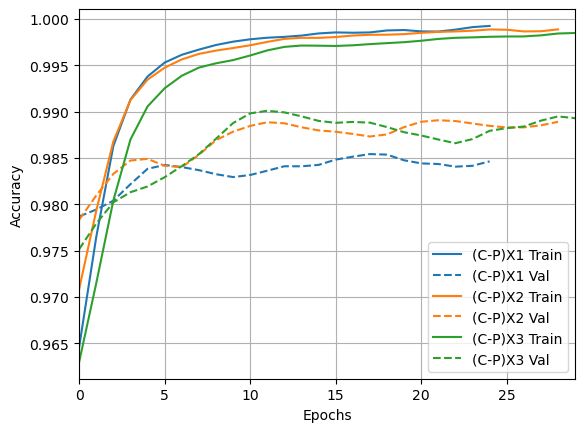

In [28]:
plotter.plot(histories)

In [31]:
histories_cp2 = {}

In [37]:
model2_8 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(8, kernel_size=5, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(16, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

histories_cp2['(C-P)x2_8'] = compile_and_fit(model2_8, '(C-P)x2_8')

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 14, 14, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 16)        3216      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 784)             

c:\Users\rohit\anaconda3\envs\environment\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1041/1050 [============================>.] - ETA: 0s - loss: 0.1748 - accuracy: 0.9452
Epoch: 0, accuracy:0.9455,  loss:0.1740,  val_accuracy:0.9806,  val_loss:0.0673,  
1050/1050 [==============================] - 6s 5ms/step - loss: 0.1740 - accuracy: 0.9455 - val_loss: 0.0673 - val_accuracy: 0.9806
Epoch 2/10000
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0563 - accuracy: 0.9828 - val_loss: 0.0936 - val_accuracy: 0.9725
Epoch 3/10000
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0406 - accuracy: 0.9872 - val_loss: 0.0679 - val_accuracy: 0.9818
Epoch 4/10000
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0281 - accuracy: 0.9915 - val_loss: 0.0532 - val_accuracy: 0.9856
Epoch 5/10000
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0217 - accuracy: 0.9927 - val_loss: 0.0756 - val_accuracy: 0.9823
Epoch 6/10000
1050/1050 [==============================] - 5s 4ms/step - loss: 0.0213 - accuracy: 0.9929 - va

In [38]:
model2_16 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size=5, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(32, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

histories_cp2['(C-P)x2_16'] = compile_and_fit(model2_16, '(C-P)x2_16')

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 28, 28, 16)        416       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 14, 14, 32)        12832     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 flatten_13 (Flatten)        (None, 1568)              0         
                                                                 
 dense_39 (Dense)            (None, 784)             

In [39]:
model2_32 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=5, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

histories_cp2['(C-P)x2_32'] = compile_and_fit(model2_32, '(C-P)x2_32')

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 3136)              0         
                                                                 
 dense_42 (Dense)            (None, 784)             

In [40]:
model2_64 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, kernel_size=5, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

histories_cp2['(C-P)x2_64'] = compile_and_fit(model2_64, '(C-P)x2_64')

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 14, 14, 128)       204928    
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 6272)              0         
                                                                 
 dense_45 (Dense)            (None, 784)             

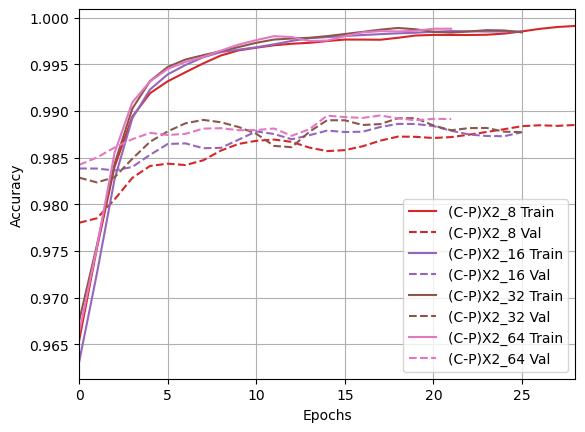

In [41]:
plotter.plot(histories_cp2)

In [44]:
histories_cp2_32 = {}

In [49]:
model2_32_0 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=5, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

histories_cp2_32['(C-P)x2_32_0'] = compile_and_fit(model2_32_0, '(C-P)x2_32_0')

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_22 (Flatten)        (None, 3136)              0         
                                                                 
 dense_63 (Dense)            (None, 784)             

c:\Users\rohit\anaconda3\envs\environment\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1046/1050 [============================>.] - ETA: 0s - loss: 0.1327 - accuracy: 0.9587
Epoch: 0, accuracy:0.9588,  loss:0.1323,  val_accuracy:0.9814,  val_loss:0.0642,  
1050/1050 [==============================] - 6s 5ms/step - loss: 0.1323 - accuracy: 0.9588 - val_loss: 0.0642 - val_accuracy: 0.9814
Epoch 2/10000
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0405 - accuracy: 0.9872 - val_loss: 0.0521 - val_accuracy: 0.9838
Epoch 3/10000
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0270 - accuracy: 0.9916 - val_loss: 0.0512 - val_accuracy: 0.9852
Epoch 4/10000
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0191 - accuracy: 0.9941 - val_loss: 0.0642 - val_accuracy: 0.9849
Epoch 5/10000
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0166 - accuracy: 0.9949 - val_loss: 0.0467 - val_accuracy: 0.9877
Epoch 6/10000
1050/1050 [==============================] - 5s 5ms/step - loss: 0.0135 - accuracy: 0.9954 - va

In [47]:
model2_32_32 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=5, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

histories_cp2_32['(C-P)x2_32_32'] = compile_and_fit(model2_32_32, '(C-P)x2_32_32')

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_20 (Flatten)        (None, 3136)              0         
                                                                 
 dense_57 (Dense)            (None, 784)             

In [50]:
model2_32_64 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=5, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

histories_cp2_32['(C-P)x2_32_64'] = compile_and_fit(model2_32_64, '(C-P)x2_32_64')

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_23 (Flatten)        (None, 3136)              0         
                                                                 
 dense_65 (Dense)            (None, 784)             

In [51]:
model2_32_128 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=5, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

histories_cp2_32['(C-P)x2_32_128'] = compile_and_fit(model2_32_128, '(C-P)x2_32_128')

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_24 (Flatten)        (None, 3136)              0         
                                                                 
 dense_68 (Dense)            (None, 784)             

In [52]:
model2_32_256 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=5, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

histories_cp2_32['(C-P)x2_32_256'] = compile_and_fit(model2_32_256, '(C-P)x2_32_256')

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_46 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_25 (Flatten)        (None, 3136)              0         
                                                                 
 dense_71 (Dense)            (None, 784)             

In [53]:
model2_32_512 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=5, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

histories_cp2_32['(C-P)x2_32_512'] = compile_and_fit(model2_32_512, '(C-P)x2_32_512')

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_49 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_26 (Flatten)        (None, 3136)              0         
                                                                 
 dense_74 (Dense)            (None, 784)             

In [54]:
model2_32_1024 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=5, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

histories_cp2_32['(C-P)x2_32_1024'] = compile_and_fit(model2_32_1024, '(C-P)x2_32_1024')

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_50 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_51 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_27 (Flatten)        (None, 3136)              0         
                                                                 
 dense_77 (Dense)            (None, 784)             

In [55]:
model2_32_2048 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=5, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

histories_cp2_32['(C-P)x2_32_2048'] = compile_and_fit(model2_32_2048, '(C-P)x2_32_2048')

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_52 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_52 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_53 (Conv2D)          (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_53 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_28 (Flatten)        (None, 3136)              0         
                                                                 
 dense_80 (Dense)            (None, 784)             

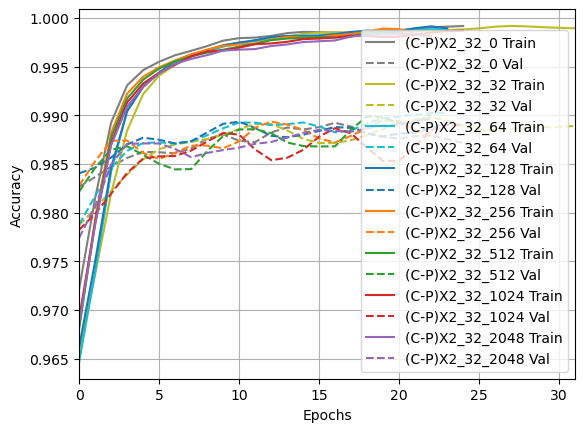

In [56]:
plotter.plot(histories_cp2_32)

In [17]:
histories_cp2_32_512 = {}

In [19]:
model2_32_512_0 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=5, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dropout(0),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0),
    tf.keras.layers.Dense(10, activation='softmax')
])

histories_cp2_32_512['(C-P)x2_32_512_0'] = compile_and_fit(model2_32_512_0, '(C-P)x2_32_512_0')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dropout (Dropout)           (None, 3136)              0

C:\Users\rohit\anaconda3\envs\environment\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1044/1050 [============================>.] - ETA: 0s - loss: 0.1416 - accuracy: 0.9554
Epoch: 0, accuracy:0.9556,  loss:0.1412,  val_accuracy:0.9852,  val_loss:0.0500,  
1050/1050 [==============================] - 25s 13ms/step - loss: 0.1412 - accuracy: 0.9556 - val_loss: 0.0500 - val_accuracy: 0.9852
Epoch 2/10000
1050/1050 [==============================] - 13s 13ms/step - loss: 0.0497 - accuracy: 0.9850 - val_loss: 0.0484 - val_accuracy: 0.9867
Epoch 3/10000
1050/1050 [==============================] - 13s 13ms/step - loss: 0.0340 - accuracy: 0.9900 - val_loss: 0.0470 - val_accuracy: 0.9862
Epoch 4/10000
1050/1050 [==============================] - 13s 12ms/step - loss: 0.0269 - accuracy: 0.9924 - val_loss: 0.0849 - val_accuracy: 0.9813
Epoch 5/10000
1050/1050 [==============================] - 12s 12ms/step - loss: 0.0218 - accuracy: 0.9936 - val_loss: 0.0355 - val_accuracy: 0.9890
Epoch 6/10000
1050/1050 [==============================] - 14s 13ms/step - loss: 0.0169 - accuracy:

In [21]:
model2_32_512_10 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=5, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='softmax')
])

histories_cp2_32_512['(C-P)x2_32_512_10'] = compile_and_fit(model2_32_512_10, '(C-P)x2_32_512_10')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dropout_4 (Dropout)         (None, 3136)             

In [22]:
model2_32_512_20 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=5, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.20),
    tf.keras.layers.Dense(10, activation='softmax')
])

histories_cp2_32_512['(C-P)x2_32_512_20'] = compile_and_fit(model2_32_512_20, '(C-P)x2_32_512_20')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 3136)              0         
                                                                 
 dropout_7 (Dropout)         (None, 3136)             

In [23]:
model2_32_512_30 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=5, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.30),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dropout(0.30),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.30),
    tf.keras.layers.Dense(10, activation='softmax')
])

histories_cp2_32_512['(C-P)x2_32_512_30'] = compile_and_fit(model2_32_512_0, '(C-P)x2_32_512_30')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dropout (Dropout)           (None, 3136)              0

In [24]:
model2_32_512_40 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=5, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.40),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dropout(0.40),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.40),
    tf.keras.layers.Dense(10, activation='softmax')
])

histories_cp2_32_512['(C-P)x2_32_512_40'] = compile_and_fit(model2_32_512_40, '(C-P)x2_32_512_40')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 3136)              0         
                                                                 
 dropout_13 (Dropout)        (None, 3136)             

In [25]:
model2_32_512_50 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=5, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.50),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dropout(0.50),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.50),
    tf.keras.layers.Dense(10, activation='softmax')
])

histories_cp2_32_512['(C-P)x2_32_512_50'] = compile_and_fit(model2_32_512_0, '(C-P)x2_32_512_50')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dropout (Dropout)           (None, 3136)              0

In [26]:
model2_32_512_60 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=5, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.60),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dropout(0.60),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.60),
    tf.keras.layers.Dense(10, activation='softmax')
])

histories_cp2_32_512['(C-P)x2_32_512_60'] = compile_and_fit(model2_32_512_0, '(C-P)x2_32_512_60')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dropout (Dropout)           (None, 3136)              0

In [29]:
model2_32_512_70 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=5, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, kernel_size=5, padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.70),
    tf.keras.layers.Dense(784, activation='relu'),
    tf.keras.layers.Dropout(0.70),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.70),
    tf.keras.layers.Dense(10, activation='softmax')
])

histories_cp2_32_512['(C-P)x2_32_512_70'] = compile_and_fit(model2_32_512_70, '(C-P)x2_32_512_70')

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 64)        51264     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 3136)              0         
                                                                 
 dropout_25 (Dropout)        (None, 3136)             

C:\Users\rohit\anaconda3\envs\environment\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1047/1050 [============================>.] - ETA: 0s - loss: 0.4454 - accuracy: 0.8521
Epoch: 0, accuracy:0.8525,  loss:0.4447,  val_accuracy:0.9764,  val_loss:0.0783,  
1050/1050 [==============================] - 7s 6ms/step - loss: 0.4447 - accuracy: 0.8525 - val_loss: 0.0783 - val_accuracy: 0.9764
Epoch 2/10000
1050/1050 [==============================] - 6s 6ms/step - loss: 0.1553 - accuracy: 0.9557 - val_loss: 0.0497 - val_accuracy: 0.9855
Epoch 3/10000
1050/1050 [==============================] - 6s 6ms/step - loss: 0.1224 - accuracy: 0.9664 - val_loss: 0.0506 - val_accuracy: 0.9851
Epoch 4/10000
1050/1050 [==============================] - 6s 6ms/step - loss: 0.1144 - accuracy: 0.9682 - val_loss: 0.0383 - val_accuracy: 0.9895
Epoch 5/10000
1050/1050 [==============================] - 6s 6ms/step - loss: 0.1095 - accuracy: 0.9691 - val_loss: 0.0437 - val_accuracy: 0.9868
Epoch 6/10000
1050/1050 [==============================] - 6s 6ms/step - loss: 0.1035 - accuracy: 0.9725 - va

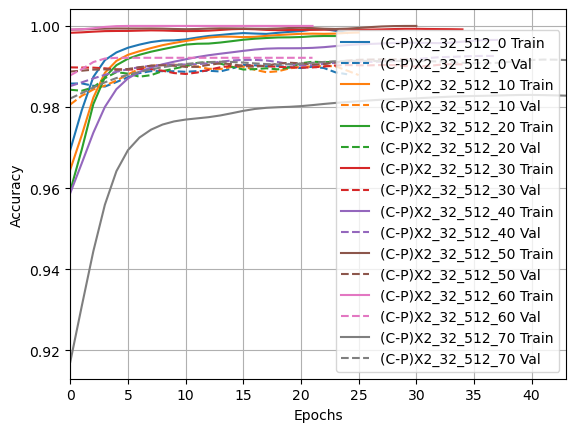

In [30]:
plotter.plot(histories_cp2_32_512)

In [51]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, kernel_size=5, str padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),
    
    tf.keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

history = compile_and_fit(model, 'model')

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_35 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_36 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_32 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_37 (Bat  (None, 28, 28, 32)      

C:\Users\rohit\anaconda3\envs\environment\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


919/919 [==============================] - ETA: 0s - loss: 0.1615 - accuracy: 0.9512
Epoch: 0, accuracy:0.9512,  loss:0.1615,  val_accuracy:0.9579,  val_loss:0.1769,  
919/919 [==============================] - 12s 12ms/step - loss: 0.1615 - accuracy: 0.9512 - val_loss: 0.1769 - val_accuracy: 0.9579
Epoch 2/10000
919/919 [==============================] - 11s 12ms/step - loss: 0.0794 - accuracy: 0.9764 - val_loss: 0.1252 - val_accuracy: 0.9649
Epoch 3/10000
919/919 [==============================] - 11s 12ms/step - loss: 0.0698 - accuracy: 0.9792 - val_loss: 0.0807 - val_accuracy: 0.9741
Epoch 4/10000
919/919 [==============================] - 11s 12ms/step - loss: 0.0584 - accuracy: 0.9824 - val_loss: 0.0542 - val_accuracy: 0.9835
Epoch 5/10000
919/919 [==============================] - 11s 12ms/step - loss: 0.0555 - accuracy: 0.9838 - val_loss: 0.0584 - val_accuracy: 0.9830
Epoch 6/10000
919/919 [==============================] - 11s 11ms/step - loss: 0.0424 - accuracy: 0.9879 - val_

919/919 [==============================] - 11s 12ms/step - loss: 0.0070 - accuracy: 0.9984 - val_loss: 0.0661 - val_accuracy: 0.9878
Epoch 54/10000
919/919 [==============================] - 10s 11ms/step - loss: 0.0146 - accuracy: 0.9968 - val_loss: 0.0772 - val_accuracy: 0.9846
Epoch 55/10000
919/919 [==============================] - 10s 11ms/step - loss: 0.0092 - accuracy: 0.9980 - val_loss: 0.0714 - val_accuracy: 0.9906
Epoch 56/10000
919/919 [==============================] - 10s 11ms/step - loss: 0.0076 - accuracy: 0.9981 - val_loss: 0.0813 - val_accuracy: 0.9903
Epoch 57/10000
919/919 [==============================] - 10s 11ms/step - loss: 0.0059 - accuracy: 0.9984 - val_loss: 0.0691 - val_accuracy: 0.9929
Epoch 58/10000
919/919 [==============================] - 10s 11ms/step - loss: 0.0128 - accuracy: 0.9976 - val_loss: 0.0767 - val_accuracy: 0.9914
Epoch 59/10000
919/919 [==============================] - 11s 12ms/step - loss: 0.0088 - accuracy: 0.9983 - val_loss: 0.0721 - 

In [54]:
accuracy_score([np.argmax(i) for i in model.predict(test_X)], test_y)

197/197 [==============================] - 1s 4ms/step


0.9914285714285714

In [55]:
accuracy_score([np.argmax(i) for i in model.predict(train_X)], train_y)

919/919 [==============================] - 3s 3ms/step


0.9990135718902003

In [56]:
sub = pd.read_csv('./test.csv')
sub/255.0

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
sub = sub.to_numpy().reshape(-1, 28, 28)[..., tf.newaxis].astype("float32")
sub

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [58]:
model.predict(sub)

875/875 [==============================] - 3s 3ms/step


array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [59]:
out = [np.argmax(i) for i in model.predict(sub)]
submission = pd.DataFrame({'ImageId': range(1, 28001),
                           'Label':out})
submission

875/875 [==============================] - 3s 3ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,4
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [60]:
submission.to_csv('./submission.csv', index=False)

In [44]:
model.load_weights(checkpoint_filepath)

In [45]:
accuracy_score([np.argmax(i) for i in model.predict(X_test2)], y_test)

263/263 [==============================] - 1s 4ms/step


0.9940476190476191

In [46]:
accuracy_score([np.argmax(i) for i in model.predict(X_train2)], y_train)

1050/1050 [==============================] - 3s 3ms/step


0.999702380952381

In [25]:
tf.keras.models.save_model(model, './0.99')

INFO:tensorflow:Assets written to: ./0.99\assets


INFO:tensorflow:Assets written to: ./0.99\assets
